# Boxplots to show difference between classes for feature & target variables

In [1]:
# import dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas

import matplotlib.pyplot as plt
import scipy.stats as sts
import matplotlib as mpl

# inline charts & graphs
%matplotlib inline

In [2]:
# load files
df = pd.read_csv("countryClusters.csv")
maxND = pd.read_csv("log_maxND.csv")
NC3mnth = pd.read_csv("log_NC_3mnth.csv")
ND3mnth = pd.read_csv("log_ND_3mnth.csv")
TD3mnth = pd.read_csv("log_TD_3mnth.csv")
TC3mnth = pd.read_csv("log_maxNC_TC3mnth.csv")
interv_maxNCND = pd.read_csv("log_maxNCND.csv")
rankSum = pd.read_csv("classRankSum.csv")

df

,country,primary_key,iso_code,population,population_density,median_age,gdp_per_capita,interval_GRRamp,interval_GRToFirstNC,interval_firstNCToMaxNC,...,mobil_outdoors,mobil_retailRecreation,mobil_parks,mobil_GroceryPharmacy,mobil_transitStations,mobil_workplaces,PC 1,PC 2,PC 3,Class
0,Afghanistan,AFG2020-08-31,AFG,38928341.0,54.422,18.6,0.000,42,-5,76,...,-21.192308,-29.666667,-10.076923,-13.307692,-31.410256,-21.500000,-0.560973,-1.470131,-0.550939,0
1,Albania,ALB2020-08-31,ALB,2877800.0,104.871,38.0,0.000,78,0,169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.160438,-0.737601,1.666770,0
2,Algeria,DZA2020-08-31,DZA,43851043.0,17.348,29.1,0.000,149,-15,135,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.755310,-1.234352,1.208069,0
3,Angola,AGO2020-08-31,AGO,32866268.0,23.890,16.8,0.000,16,-2,135,...,-34.142910,-39.761905,-34.577778,-21.725581,-54.162562,-20.486726,1.270850,-1.549489,-0.890229,2
4,Argentina,ARG2020-08-31,ARG,45195777.0,16.177,31.9,0.000,21,0,179,...,-51.925661,-65.059556,-73.733333,-28.504444,-60.525193,-31.805778,3.628441,-1.644506,0.546956,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Venezuela,VEN2020-08-31,VEN,28435943.0,36.253,29.0,0.000,99,0,150,...,-46.002222,-54.411111,-47.477778,-33.966667,-55.400000,-38.755556,2.657356,-1.673928,0.287195,2
158,Vietnam,VNM2020-08-31,VNM,97338583.0,308.127,32.6,6171.884,71,-5,184,...,-21.406215,-27.892948,-20.971131,-20.098515,-32.089387,-5.979096,0.109195,-2.157741,0.352515,2
159,Yemen,YEM2020-08-31,YEM,29825968.0,53.508,20.3,0.000,21,0,67,...,-7.180000,-8.622222,-10.466667,1.633333,-9.344444,-9.100000,-3.200945,-0.192860,-1.439579,0
160,Zambia,ZMB2020-08-31,ZMB,18383956.0,22.995,17.7,0.000,44,0,121,...,-8.420000,-12.600000,-1.488889,-4.111111,-16.433333,-7.466667,-2.085667,-0.864230,-0.869589,0


In [3]:
df.isnull().sum()

country                    0
primary_key                0
iso_code                   0
population                 0
population_density         0
median_age                 0
gdp_per_capita             0
interval_GRRamp            0
interval_GRToFirstNC       0
interval_firstNCToMaxNC    0
interval_firstNCToMaxND    0
index_MaxGR                0
index_avgMaxGRStartApr1    0
change_GRRamp              0
index_string               0
index_health               0
index_econ                 0
value_maxNC                0
value_maxND                0
value_NC_3mnth             0
value_TC_3mnth             0
value_ND_3mnth             0
value_TD_3mnth             0
percent_maxNC              0
percent_maxND              0
percent_NC_3mnth           0
percent_ND_3mnth           0
percent_TC_3mnth           0
percent_TD_3mnth           0
percent_newTestsMean       0
value_totTestsSlope        0
mobil_residential          0
mobil_outdoors             0
mobil_retailRecreation     0
mobil_parks   

In [4]:
df.columns

Index(['country', 'primary_key', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'interval_GRRamp',
       'interval_GRToFirstNC', 'interval_firstNCToMaxNC',
       'interval_firstNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean', 'value_totTestsSlope',
       'mobil_residential', 'mobil_outdoors', 'mobil_retailRecreation',
       'mobil_parks', 'mobil_GroceryPharmacy', 'mobil_transitStations',
       'mobil_workplaces', 'PC 1', 'PC 2', 'PC 3', 'Class'],
      dtype='object')

In [5]:
df.describe()

,population,population_density,median_age,gdp_per_capita,interval_GRRamp,interval_GRToFirstNC,interval_firstNCToMaxNC,interval_firstNCToMaxND,index_MaxGR,index_avgMaxGRStartApr1,...,mobil_outdoors,mobil_retailRecreation,mobil_parks,mobil_GroceryPharmacy,mobil_transitStations,mobil_workplaces,PC 1,PC 2,PC 3,Class
count,1.620000e+02,162.000000,162.000000,162.00000,162.000000,162.000000,162.000000,162.00000,162.000000,162.000000,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02,1.620000e+02,1.620000e+02,162.000000
mean,4.731370e+07,194.406907,30.460494,1015.71971,51.500000,-4.037037,110.382716,97.62963,75.912160,64.283852,...,-23.172992,-30.196347,-14.652329,-15.451298,-33.204701,-22.360287,-1.260994e-16,4.934325e-17,6.373503e-17,1.074074
std,1.608816e+08,649.779115,9.257546,3408.66314,35.756813,11.045861,56.488677,54.92953,12.632241,12.334097,...,18.768244,21.989672,26.978779,15.324422,23.457602,17.558949,2.427891e+00,1.998745e+00,1.468949e+00,0.949374
min,9.834000e+04,1.980000,15.100000,0.00000,0.000000,-53.000000,2.000000,0.00000,14.100000,12.116340,...,-66.406271,-74.133333,-73.733333,-61.810069,-78.248227,-60.900000,-4.522697e+00,-2.887911e+00,-4.768840e+00,0.000000
25%,4.281614e+06,31.077750,22.050000,0.00000,26.000000,-6.000000,61.500000,46.50000,70.670000,57.923039,...,-37.315327,-47.700889,-31.417554,-25.377981,-50.825974,-35.784750,-2.295293e+00,-1.421548e+00,-9.348702e-01,0.000000
50%,1.056602e+07,80.185500,29.600000,0.00000,42.500000,0.000000,123.500000,102.00000,78.850000,65.251667,...,-23.559322,-33.538137,-11.257143,-13.151831,-35.099984,-24.639699,1.414125e-01,-4.863488e-01,-1.042805e-01,1.000000
75%,3.447770e+07,155.294000,38.700000,0.00000,67.500000,0.000000,159.000000,143.75000,84.620000,72.208905,...,0.000000,-7.452778,0.000000,0.000000,-5.044444,-0.080031,1.877444e+00,8.294248e-01,1.009912e+00,2.000000
max,1.439324e+09,7915.731000,48.200000,24055.58800,191.000000,28.000000,212.000000,219.00000,96.150000,86.684510,...,1.700473,0.000000,95.608534,13.888889,0.000000,9.477778,6.278380e+00,8.688565e+00,5.859052e+00,2.000000


In [6]:
# incorporate log dfs
maxND_val = maxND['logPercent_maxND']
df['logPercent_maxND'] = maxND_val
df.columns

Index(['country', 'primary_key', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'interval_GRRamp',
       'interval_GRToFirstNC', 'interval_firstNCToMaxNC',
       'interval_firstNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean', 'value_totTestsSlope',
       'mobil_residential', 'mobil_outdoors', 'mobil_retailRecreation',
       'mobil_parks', 'mobil_GroceryPharmacy', 'mobil_transitStations',
       'mobil_workplaces', 'PC 1', 'PC 2', 'PC 3', 'Class',
       'logPercent_maxND'],
      dtype='object')

In [7]:
NC3mnth_val = NC3mnth['logPercent_NC_3mnth']
df['logPercent_NC_3mnth'] = NC3mnth_val
df.columns

Index(['country', 'primary_key', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'interval_GRRamp',
       'interval_GRToFirstNC', 'interval_firstNCToMaxNC',
       'interval_firstNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean', 'value_totTestsSlope',
       'mobil_residential', 'mobil_outdoors', 'mobil_retailRecreation',
       'mobil_parks', 'mobil_GroceryPharmacy', 'mobil_transitStations',
       'mobil_workplaces', 'PC 1', 'PC 2', 'PC 3', 'Class', 'logPercent_maxND',
       'logPercent_NC_3mnth'],
      dtype='object')

In [8]:
ND3mnth_val = ND3mnth['logPercent_ND_3mnth']
df['logPercent_ND_3mnth'] = ND3mnth_val
df.columns

Index(['country', 'primary_key', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'interval_GRRamp',
       'interval_GRToFirstNC', 'interval_firstNCToMaxNC',
       'interval_firstNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean', 'value_totTestsSlope',
       'mobil_residential', 'mobil_outdoors', 'mobil_retailRecreation',
       'mobil_parks', 'mobil_GroceryPharmacy', 'mobil_transitStations',
       'mobil_workplaces', 'PC 1', 'PC 2', 'PC 3', 'Class', 'logPercent_maxND',
       'logPercent_NC_3mnth', 'logPercent_ND_3mnth'],
      dtype='object')

In [9]:
TD3mnth_val = TD3mnth['logPercent_TD_3mnth']
df['logPercent_TD_3mnth'] = TD3mnth_val
df.columns

Index(['country', 'primary_key', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'interval_GRRamp',
       'interval_GRToFirstNC', 'interval_firstNCToMaxNC',
       'interval_firstNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean', 'value_totTestsSlope',
       'mobil_residential', 'mobil_outdoors', 'mobil_retailRecreation',
       'mobil_parks', 'mobil_GroceryPharmacy', 'mobil_transitStations',
       'mobil_workplaces', 'PC 1', 'PC 2', 'PC 3', 'Class', 'logPercent_maxND',
       'logPercent_NC_3mnth', 'logPercent_ND_3mnth', 'logPercent_TD_3mnth'],
      dtype='object')

In [10]:
TC3mnth_val = TC3mnth['logPercent_TC_3mnth']
df['logPercent_TC_3mnth'] = TC3mnth_val
df.columns

Index(['country', 'primary_key', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'interval_GRRamp',
       'interval_GRToFirstNC', 'interval_firstNCToMaxNC',
       'interval_firstNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean', 'value_totTestsSlope',
       'mobil_residential', 'mobil_outdoors', 'mobil_retailRecreation',
       'mobil_parks', 'mobil_GroceryPharmacy', 'mobil_transitStations',
       'mobil_workplaces', 'PC 1', 'PC 2', 'PC 3', 'Class', 'logPercent_maxND',
       'logPercent_NC_3mnth', 'logPercent_ND_3mnth', 'logPercent_TD_3mnth',
       'logPercent_TC_3mnth'],
      dtype='object')

In [11]:
maxNC_val = TC3mnth['logPercent_maxNC']
df['logPercent_maxNC'] = maxNC_val
df.columns

Index(['country', 'primary_key', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'interval_GRRamp',
       'interval_GRToFirstNC', 'interval_firstNCToMaxNC',
       'interval_firstNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean', 'value_totTestsSlope',
       'mobil_residential', 'mobil_outdoors', 'mobil_retailRecreation',
       'mobil_parks', 'mobil_GroceryPharmacy', 'mobil_transitStations',
       'mobil_workplaces', 'PC 1', 'PC 2', 'PC 3', 'Class', 'logPercent_maxND',
       'logPercent_NC_3mnth', 'logPercent_ND_3mnth', 'logPercent_TD_3mnth',
       'logPercent_TC_3mnth', 'logPercent_maxNC'],
      dtype='ob

In [12]:
display(interv_maxNCND)
interv_maxNC_val = interv_maxNCND['logInterval_firstNCToMaxNC']
interv_maxND_val = interv_maxNCND['logInterval_firstNCToMaxND']
df['logInterval_maxNC'] = interv_maxNC_val
df['logInterval_maxND'] = interv_maxND_val
df.columns

,Unnamed: 0,country,PC 1,PC 2,PC 3,Class,logInterval_firstNCToMaxNC,logInterval_firstNCToMaxND
0,0,Afghanistan,-0.560973,-1.470131,-0.550939,0,1.880814,2.123852
1,1,Albania,-2.160438,-0.737601,1.666770,0,2.227887,2.143015
2,2,Algeria,-2.755310,-1.234352,1.208069,0,2.130334,1.579784
3,3,Angola,1.270850,-1.549489,-0.890229,2,2.130334,2.113943
4,4,Argentina,3.628441,-1.644506,0.546956,2,2.252853,2.243038
...,...,...,...,...,...,...,...,...
151,157,Venezuela,2.657356,-1.673928,0.287195,2,2.176091,2.225309
152,158,Vietnam,0.109195,-2.157741,0.352515,2,2.264818,2.303196
153,159,Yemen,-3.200945,-0.192860,-1.439579,0,1.826075,1.973128
154,160,Zambia,-2.085667,-0.864230,-0.869589,0,2.082785,2.071882


Index(['country', 'primary_key', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'interval_GRRamp',
       'interval_GRToFirstNC', 'interval_firstNCToMaxNC',
       'interval_firstNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean', 'value_totTestsSlope',
       'mobil_residential', 'mobil_outdoors', 'mobil_retailRecreation',
       'mobil_parks', 'mobil_GroceryPharmacy', 'mobil_transitStations',
       'mobil_workplaces', 'PC 1', 'PC 2', 'PC 3', 'Class', 'logPercent_maxND',
       'logPercent_NC_3mnth', 'logPercent_ND_3mnth', 'logPercent_TD_3mnth',
       'logPercent_TC_3mnth', 'logPercent_maxNC', 'logInterval_max

In [13]:
# save to csv
df.to_csv("govRespOutcomes_clusters.csv", index=False)

## plot cases vs deaths to pick one or the other (for comparison of classes via boxplots)
conclusion: could not pick one or the other (correlation not high enough - there's different info in both)

## max NC & ND

In [14]:
# scatter plot: shows relationship for the clusters
df.hvplot.scatter(x="logPercent_maxNC", y="logPercent_maxND", by="Class", hover_cols=['country'])

:NdOverlay   [Class]
   :Scatter   [logPercent_maxNC]   (logPercent_maxND,country)

In [15]:
# scatter plot: shows relationship for the clusters
df.hvplot.scatter(x="percent_maxNC", y="percent_maxND", by="Class", hover_cols=['country'])

:NdOverlay   [Class]
   :Scatter   [percent_maxNC]   (percent_maxND,country)

## NC & ND 3mnth

In [16]:
# scatter plot: shows relationship for the clusters
df.hvplot.scatter(x="logPercent_NC_3mnth", y="logPercent_ND_3mnth", by="Class", hover_cols=['country'])

:NdOverlay   [Class]
   :Scatter   [logPercent_NC_3mnth]   (logPercent_ND_3mnth,country)

In [17]:
# scatter plot: shows relationship for the clusters
df.hvplot.scatter(x="percent_NC_3mnth", y="percent_ND_3mnth", by="Class", hover_cols=['country'])

:NdOverlay   [Class]
   :Scatter   [percent_NC_3mnth]   (percent_ND_3mnth,country)

## TC & TD 3 mnth

In [18]:
# scatter plot: shows relationship for the clusters
df.hvplot.scatter(x="logPercent_TC_3mnth", y="logPercent_TD_3mnth", by="Class", hover_cols=['country'])

:NdOverlay   [Class]
   :Scatter   [logPercent_TC_3mnth]   (logPercent_TD_3mnth,country)

In [19]:
# scatter plot: shows relationship for the clusters
df.hvplot.scatter(x="percent_TC_3mnth", y="percent_TD_3mnth", by="Class", hover_cols=['country'])

:NdOverlay   [Class]
   :Scatter   [percent_TC_3mnth]   (percent_TD_3mnth,country)

## interval to max NC & ND

In [20]:
# scatter plot: shows relationship for the clusters
df.hvplot.scatter(x="logInterval_maxNC", y="logInterval_maxND", by="Class", hover_cols=['country'])

:NdOverlay   [Class]
   :Scatter   [logInterval_maxNC]   (logInterval_maxND,country)

In [21]:
# scatter plot: shows relationship for the clusters
df.hvplot.scatter(x="interval_firstNCToMaxNC", y="interval_firstNCToMaxND", by="Class", hover_cols=['country'])

:NdOverlay   [Class]
   :Scatter   [interval_firstNCToMaxNC]   (interval_firstNCToMaxND,country)

In [22]:
# compare amount of data in cases vs deaths
df.isnull().sum()

country                      0
primary_key                  0
iso_code                     0
population                   0
population_density           0
median_age                   0
gdp_per_capita               0
interval_GRRamp              0
interval_GRToFirstNC         0
interval_firstNCToMaxNC      0
interval_firstNCToMaxND      0
index_MaxGR                  0
index_avgMaxGRStartApr1      0
change_GRRamp                0
index_string                 0
index_health                 0
index_econ                   0
value_maxNC                  0
value_maxND                  0
value_NC_3mnth               0
value_TC_3mnth               0
value_ND_3mnth               0
value_TD_3mnth               0
percent_maxNC                0
percent_maxND                0
percent_NC_3mnth             0
percent_ND_3mnth             0
percent_TC_3mnth             0
percent_TD_3mnth             0
percent_newTestsMean         0
value_totTestsSlope          0
mobil_residential            0
mobil_ou

- See "govRespOutcomes_heatmapCorrelations.ipynb" for heatmap & 1:1 linear regression correlations between
cases vs deaths (to choose one or the other as target outcomes).
- Finding: cases & deaths are correlated (as absolute & percentage values) so can choose one or the other
## Conclusion: choose CASES b/c separates out class 1 (yellow in graphs above) better than deaths

# box & whisker plots (non-log data)

In [23]:
# make percentage df by class
columns = ['Class','interval_firstNCToMaxNC','percent_maxNC',
       'percent_NC_3mnth', 'percent_TC_3mnth','interval_firstNCToMaxND','percent_maxND',
'percent_ND_3mnth','percent_TD_3mnth']

percent_df = df[columns]
display(percent_df)

# loc of each class
class0 = percent_df.loc[percent_df['Class'] == 0]
display(class0.head())

class1 = percent_df.loc[percent_df['Class'] == 1]
display(class1.head())

class2 = percent_df.loc[percent_df['Class'] == 2]
display(class2.head())

,Class,interval_firstNCToMaxNC,percent_maxNC,percent_NC_3mnth,percent_TC_3mnth,interval_firstNCToMaxND,percent_maxND,percent_ND_3mnth,percent_TD_3mnth
0,0,76,0.002731,0.000085,0.000193,133,0.000144,0.000000,0.000003
1,0,169,0.006185,0.000208,0.013309,139,0.000208,0.000000,0.000764
2,0,135,0.001539,0.000148,0.000837,38,0.000096,0.000009,0.000057
3,2,135,0.000548,0.000000,0.000073,130,0.000018,0.000000,0.000006
4,2,179,0.025954,0.000000,0.002507,175,0.000715,0.000007,0.000075
...,...,...,...,...,...,...,...,...,...
157,2,150,0.007501,0.000028,0.000665,168,0.000060,0.000000,0.000032
158,2,184,0.000051,0.000000,0.000016,201,0.000004,0.000000,0.000000
159,0,67,0.000389,0.000000,0.000114,94,0.000174,0.000000,0.000023
160,0,121,0.002867,0.000022,0.000283,118,0.000218,0.000000,0.000011


,Class,interval_firstNCToMaxNC,percent_maxNC,percent_NC_3mnth,percent_TC_3mnth,interval_firstNCToMaxND,percent_maxND,percent_ND_3mnth,percent_TD_3mnth
0,0,76,0.002731,0.000085,0.000193,133,0.000144,0.000000,0.000003
1,0,169,0.006185,0.000208,0.013309,139,0.000208,0.000000,0.000764
2,0,135,0.001539,0.000148,0.000837,38,0.000096,0.000009,0.000057
6,0,188,0.002827,0.000000,0.000086,206,0.000098,0.000000,0.000000
8,0,118,0.005819,0.000266,0.002061,144,0.000128,0.000000,0.000039


,Class,interval_firstNCToMaxNC,percent_maxNC,percent_NC_3mnth,percent_TC_3mnth,interval_firstNCToMaxND,percent_maxND,percent_ND_3mnth,percent_TD_3mnth
5,1,154,0.163910,0.005620,0.086170,34,0.000937,0.00000,0.000000
7,1,31,0.012669,0.012669,0.078045,57,0.000344,0.00020,0.000577
38,1,23,0.006622,0.003653,0.060053,15,0.000343,0.00000,0.001028
41,1,36,0.006733,0.002918,0.035323,38,0.000380,0.00019,0.000898
48,1,15,0.010101,0.004900,0.048246,35,0.000452,0.00000,0.000075


,Class,interval_firstNCToMaxNC,percent_maxNC,percent_NC_3mnth,percent_TC_3mnth,interval_firstNCToMaxND,percent_maxND,percent_ND_3mnth,percent_TD_3mnth
3,2,135,0.000548,0.000000,0.000073,130,0.000018,0.000000,0.000006
4,2,179,0.025954,0.000000,0.002507,175,0.000715,0.000007,0.000075
9,2,125,0.061472,0.002997,0.022920,124,0.000411,0.000059,0.000176
10,2,121,0.002440,0.000025,0.000100,114,0.000039,0.000003,0.000010
11,2,137,0.004176,0.000000,0.026099,19,0.000348,0.000000,0.001740


In [24]:
# cases
C0_interval_firstNCToMaxNC = class0['interval_firstNCToMaxNC']
C1_interval_firstNCToMaxNC = class1['interval_firstNCToMaxNC']
C2_interval_firstNCToMaxNC = class2['interval_firstNCToMaxNC']

C0_percent_maxNC = class0['percent_maxNC']
C1_percent_maxNC = class1['percent_maxNC']
C2_percent_maxNC = class2['percent_maxNC']

C0_percent_NC_3mnth = class0['percent_NC_3mnth']
C1_percent_NC_3mnth = class1['percent_NC_3mnth']
C2_percent_NC_3mnth = class2['percent_NC_3mnth']

C0_percent_TC_3mnth = class0['percent_TC_3mnth']
C1_percent_TC_3mnth = class1['percent_TC_3mnth']
C2_percent_TC_3mnth = class2['percent_TC_3mnth']

# deaths
C0_interval_firstNCToMaxND = class0['interval_firstNCToMaxND']
C1_interval_firstNCToMaxND = class1['interval_firstNCToMaxND']
C2_interval_firstNCToMaxND = class2['interval_firstNCToMaxND']

C0_percent_maxND = class0['percent_maxND']
C1_percent_maxND = class1['percent_maxND']
C2_percent_maxND = class2['percent_maxND']

C0_percent_ND_3mnth = class0['percent_ND_3mnth']
C1_percent_ND_3mnth = class1['percent_ND_3mnth']
C2_percent_ND_3mnth = class2['percent_ND_3mnth']

C0_percent_TD_3mnth = class0['percent_TD_3mnth']
C1_percent_TD_3mnth = class1['percent_TD_3mnth']
C2_percent_TD_3mnth = class2['percent_TD_3mnth']

# Boxplots: Target Variables (Cases & Deaths)

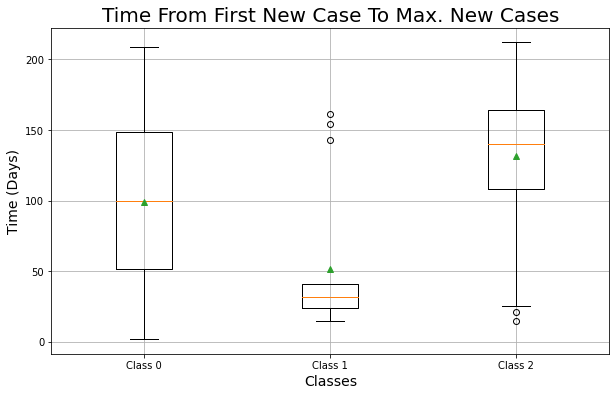

In [25]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_interval_firstNCToMaxNC, C1_interval_firstNCToMaxNC, C2_interval_firstNCToMaxNC]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Time From First New Case To Max. New Cases',fontsize=20)
ax.set_ylabel('Time (Days)',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)
ax.grid()

plt.show()

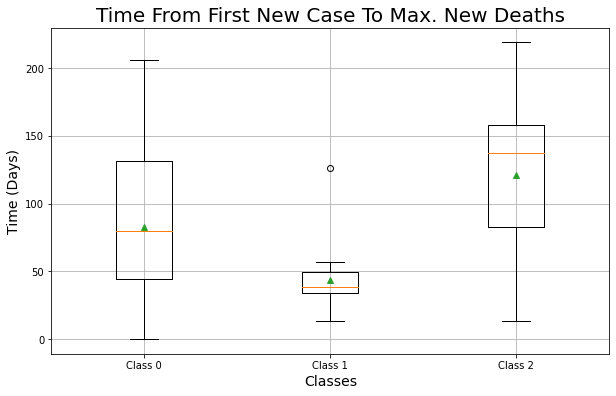

In [26]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_interval_firstNCToMaxND, C1_interval_firstNCToMaxND, C2_interval_firstNCToMaxND]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Time From First New Case To Max. New Deaths',fontsize=20)
ax.set_ylabel('Time (Days)',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

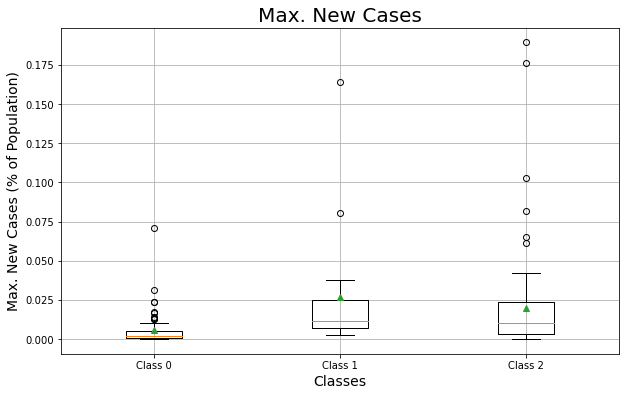

In [27]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_percent_maxNC, C1_percent_maxNC, C2_percent_maxNC]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Max. New Cases',fontsize=20)
ax.set_ylabel('Max. New Cases (% of Population)',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

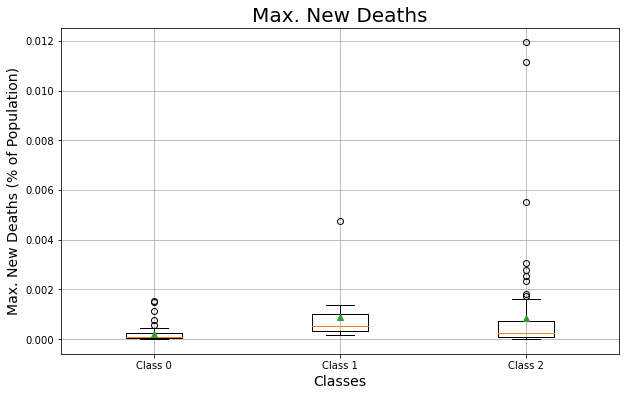

In [28]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_percent_maxND, C1_percent_maxND, C2_percent_maxND]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Max. New Deaths',fontsize=20)
ax.set_ylabel('Max. New Deaths (% of Population)',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

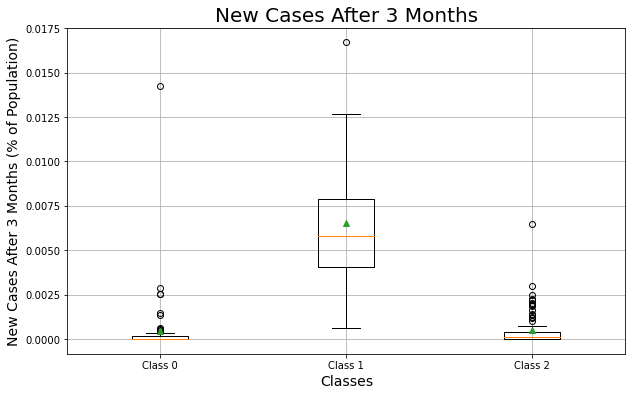

In [29]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_percent_NC_3mnth, C1_percent_NC_3mnth, C2_percent_NC_3mnth]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('New Cases After 3 Months',fontsize=20)
ax.set_ylabel('New Cases After 3 Months (% of Population)',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

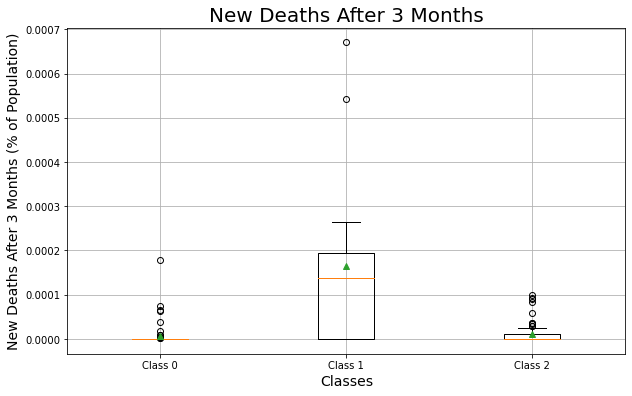

In [30]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_percent_ND_3mnth, C1_percent_ND_3mnth, C2_percent_ND_3mnth]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('New Deaths After 3 Months',fontsize=20)
ax.set_ylabel('New Deaths After 3 Months (% of Population)',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

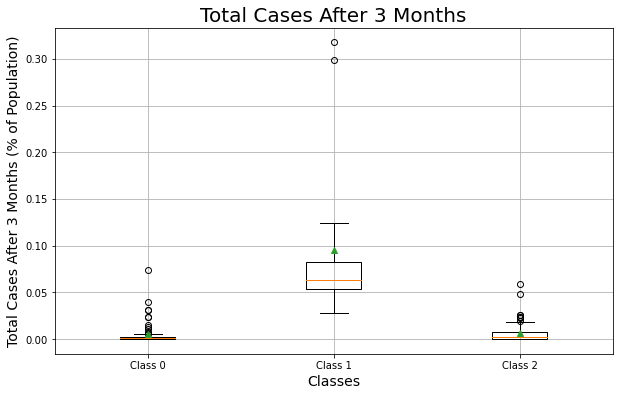

In [31]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_percent_TC_3mnth, C1_percent_TC_3mnth, C2_percent_TC_3mnth]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Total Cases After 3 Months',fontsize=20)
ax.set_ylabel('Total Cases After 3 Months (% of Population)',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

# save the figure
plt.savefig("TC3mnth.png")
plt.show()

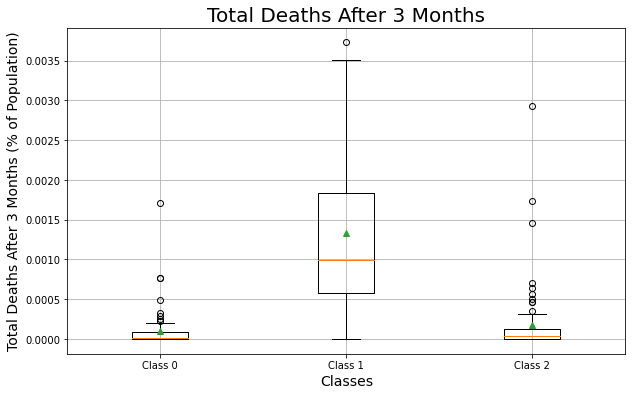

In [32]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_percent_TD_3mnth, C1_percent_TD_3mnth, C2_percent_TD_3mnth]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Total Deaths After 3 Months',fontsize=20)
ax.set_ylabel('Total Deaths After 3 Months (% of Population)',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

# Feature Variable Exploration

In [33]:
df.columns

Index(['country', 'primary_key', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'interval_GRRamp',
       'interval_GRToFirstNC', 'interval_firstNCToMaxNC',
       'interval_firstNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean', 'value_totTestsSlope',
       'mobil_residential', 'mobil_outdoors', 'mobil_retailRecreation',
       'mobil_parks', 'mobil_GroceryPharmacy', 'mobil_transitStations',
       'mobil_workplaces', 'PC 1', 'PC 2', 'PC 3', 'Class', 'logPercent_maxND',
       'logPercent_NC_3mnth', 'logPercent_ND_3mnth', 'logPercent_TD_3mnth',
       'logPercent_TC_3mnth', 'logPercent_maxNC', 'logInterval_max

In [34]:
# make features df
columns = ['population','population_density', 'median_age', 'gdp_per_capita', 'interval_GRRamp',
       'interval_GRToFirstNC', 'index_avgMaxGRStartApr1', 'index_econ','percent_newTestsMean', 'value_totTestsSlope',
       'mobil_residential', 'mobil_outdoors', 'mobil_retailRecreation',
       'mobil_parks', 'mobil_GroceryPharmacy', 'mobil_transitStations',
       'mobil_workplaces', 'Class']

features_df = df[columns]
display(features_df)

# loc of each class
class0f = features_df.loc[features_df['Class'] == 0]
display(class0f.head())

class1f = features_df.loc[features_df['Class'] == 1]
display(class1f.head())

class2f = features_df.loc[features_df['Class'] == 2]
display(class2f.head())

,population,population_density,median_age,gdp_per_capita,interval_GRRamp,interval_GRToFirstNC,index_avgMaxGRStartApr1,index_econ,percent_newTestsMean,value_totTestsSlope,mobil_residential,mobil_outdoors,mobil_retailRecreation,mobil_parks,mobil_GroceryPharmacy,mobil_transitStations,mobil_workplaces,Class
0,38928341.0,54.422,18.6,0.000,42,-5,60.578889,0.000000,0.000000,0.000000,9.333333,-21.192308,-29.666667,-10.076923,-13.307692,-31.410256,-21.500000,0
1,2877800.0,104.871,38.0,0.000,78,0,68.489542,64.133987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,43851043.0,17.348,29.1,0.000,149,-15,66.171046,44.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,32866268.0,23.890,16.8,0.000,16,-2,67.044379,39.869281,0.000000,0.000000,20.988889,-34.142910,-39.761905,-34.577778,-21.725581,-54.162562,-20.486726,2
4,45195777.0,16.177,31.9,0.000,21,0,85.190196,75.000000,0.000189,0.088563,18.844000,-51.925661,-65.059556,-73.733333,-28.504444,-60.525193,-31.805778,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,28435943.0,36.253,29.0,0.000,99,0,72.385621,50.000000,0.000064,0.054348,17.955556,-46.002222,-54.411111,-47.477778,-33.966667,-55.400000,-38.755556,2
158,97338583.0,308.127,32.6,6171.884,71,-5,67.005033,31.535948,0.000000,0.000000,9.433304,-21.406215,-27.892948,-20.971131,-20.098515,-32.089387,-5.979096,2
159,29825968.0,53.508,20.3,0.000,21,0,32.003750,0.000000,0.000300,0.104640,6.155556,-7.180000,-8.622222,-10.466667,1.633333,-9.344444,-9.100000,0
160,18383956.0,22.995,17.7,0.000,44,0,48.770523,25.000000,0.000000,0.000000,11.311111,-8.420000,-12.600000,-1.488889,-4.111111,-16.433333,-7.466667,0


,population,population_density,median_age,gdp_per_capita,interval_GRRamp,interval_GRToFirstNC,index_avgMaxGRStartApr1,index_econ,percent_newTestsMean,value_totTestsSlope,mobil_residential,mobil_outdoors,mobil_retailRecreation,mobil_parks,mobil_GroceryPharmacy,mobil_transitStations,mobil_workplaces,Class
0,38928341.0,54.422,18.6,0.0,42,-5,60.578889,0.000000,0.0,0.0,9.333333,-21.192308,-29.666667,-10.076923,-13.307692,-31.410256,-21.500000,0
1,2877800.0,104.871,38.0,0.0,78,0,68.489542,64.133987,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,43851043.0,17.348,29.1,0.0,149,-15,66.171046,44.117647,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
6,25499881.0,3.202,37.9,0.0,191,0,71.281765,75.000000,0.0,0.0,7.853035,-13.700000,-18.239683,-14.788889,0.884127,-25.447619,-10.907937,0
8,10139175.0,119.309,32.4,0.0,114,1,81.104902,47.712418,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


,population,population_density,median_age,gdp_per_capita,interval_GRRamp,interval_GRToFirstNC,index_avgMaxGRStartApr1,index_econ,percent_newTestsMean,value_totTestsSlope,mobil_residential,mobil_outdoors,mobil_retailRecreation,mobil_parks,mobil_GroceryPharmacy,mobil_transitStations,mobil_workplaces,Class
5,106766.0,584.800,41.2,0.0,22,-6,57.206928,80.473856,0.007555,0.009812,22.211268,-43.933333,-53.244444,-36.044444,-22.488889,-59.988889,-47.900000,1
7,9006400.0,106.749,44.4,0.0,34,1,62.668170,87.500000,0.000137,0.012526,13.110862,-31.129753,-49.524444,-7.187082,-17.827273,-45.025522,-36.084444,1
38,875899.0,127.657,37.3,0.0,37,0,76.879542,100.000000,0.004441,0.045657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
41,5792203.0,136.520,42.3,0.0,70,-5,70.191503,81.944444,0.000150,0.010580,10.511111,0.096892,-19.766667,95.608534,-5.644444,-37.353704,-32.359259,1
48,1326539.0,31.033,42.7,0.0,46,-13,41.612288,45.751634,0.000472,0.007475,11.413613,-15.331689,-34.109608,27.584416,-9.773779,-25.984252,-34.375221,1


,population,population_density,median_age,gdp_per_capita,interval_GRRamp,interval_GRToFirstNC,index_avgMaxGRStartApr1,index_econ,percent_newTestsMean,value_totTestsSlope,mobil_residential,mobil_outdoors,mobil_retailRecreation,mobil_parks,mobil_GroceryPharmacy,mobil_transitStations,mobil_workplaces,Class
3,32866268.0,23.890,16.8,0.000,16,-2,67.044379,39.869281,0.000000,0.000000,20.988889,-34.142910,-39.761905,-34.577778,-21.725581,-54.162562,-20.486726,2
4,45195777.0,16.177,31.9,0.000,21,0,85.190196,75.000000,0.000189,0.088563,18.844000,-51.925661,-65.059556,-73.733333,-28.504444,-60.525193,-31.805778,2
9,1701583.0,1935.907,32.4,0.000,52,15,79.494706,87.500000,0.000000,0.000000,11.388235,-22.251765,-30.058824,-30.317647,-10.847059,-25.658824,-14.376471,2
10,164689383.0,1265.036,27.5,3523.984,40,5,73.927516,54.575163,0.000020,0.038598,17.233333,-39.164444,-52.511111,-24.255556,-33.788889,-49.055556,-36.211111,2
11,287371.0,664.463,39.8,0.000,32,0,66.008693,39.297386,0.000000,0.000000,20.814286,-52.102025,-55.558824,-45.992908,-37.842767,-67.203704,-53.911924,2


In [35]:
# make series for each class and feature variable
C0_govResp = class0f['index_avgMaxGRStartApr1']
C1_govResp = class1f['index_avgMaxGRStartApr1']
C2_govResp = class2f['index_avgMaxGRStartApr1']

C0_econ = class0f['index_econ']
C1_econ = class1f['index_econ']
C2_econ = class2f['index_econ']

C0_age = class0f['median_age']
C1_age = class1f['median_age']
C2_age = class2f['median_age']

C0_mobil_outdoors = class0f['mobil_outdoors']
C1_mobil_outdoors = class1f['mobil_outdoors']
C2_mobil_outdoors = class2f['mobil_outdoors']

C0_mobil_residential = class0f['mobil_residential']
C1_mobil_residential = class1f['mobil_residential']
C2_mobil_residential = class2f['mobil_residential']

C0_interval_GRToFirstNC = class0f['interval_GRToFirstNC']
C1_interval_GRToFirstNC = class1f['interval_GRToFirstNC']
C2_interval_GRToFirstNC = class2f['interval_GRToFirstNC']

C0_interval_GRRamp = class0f['interval_GRRamp']
C1_interval_GRRamp = class1f['interval_GRRamp']
C2_interval_GRRamp = class2f['interval_GRRamp']

C0_population_density = class0f['population_density']
C1_population_density = class1f['population_density']
C2_population_density = class2f['population_density']

C0_percent_newTestsMean = class0f['percent_newTestsMean']
C1_percent_newTestsMean = class1f['percent_newTestsMean']
C2_percent_newTestsMean = class2f['percent_newTestsMean']

C0_value_totTestsSlope = class0f['value_totTestsSlope']
C1_value_totTestsSlope = class1f['value_totTestsSlope']
C2_value_totTestsSlope = class2f['value_totTestsSlope']

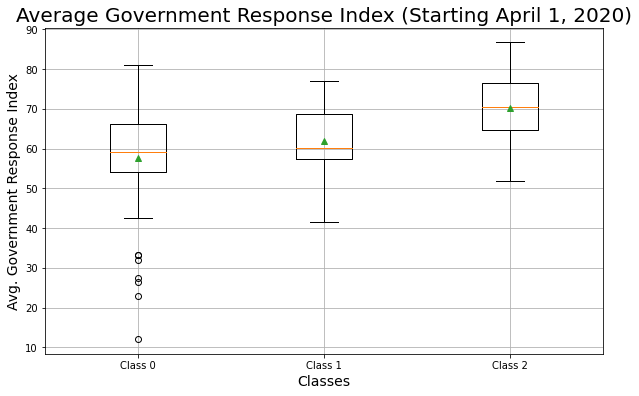

In [36]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_govResp, C1_govResp, C2_govResp]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Average Government Response Index (Starting April 1, 2020)',fontsize=20)
ax.set_ylabel('Avg. Government Response Index',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

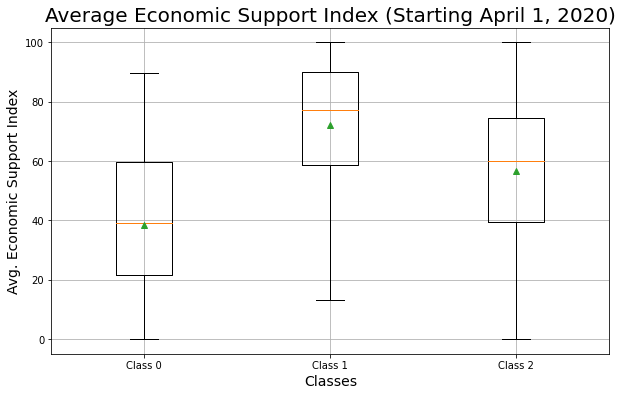

In [37]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_econ, C1_econ, C2_econ]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Average Economic Support Index (Starting April 1, 2020)',fontsize=20)
ax.set_ylabel('Avg. Economic Support Index',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

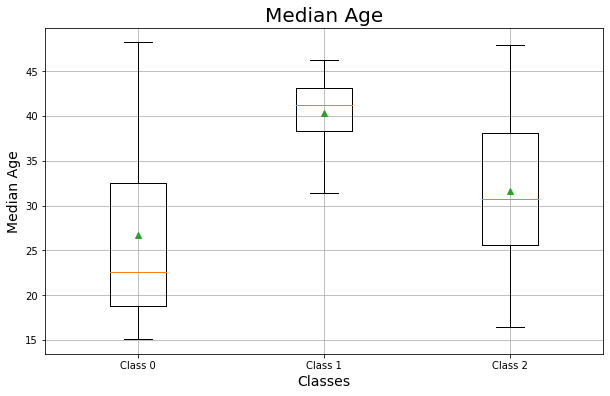

In [38]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_age, C1_age, C2_age]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Median Age',fontsize=20)
ax.set_ylabel('Median Age',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()
# save the figure
plt.savefig("age.png")
plt.show()

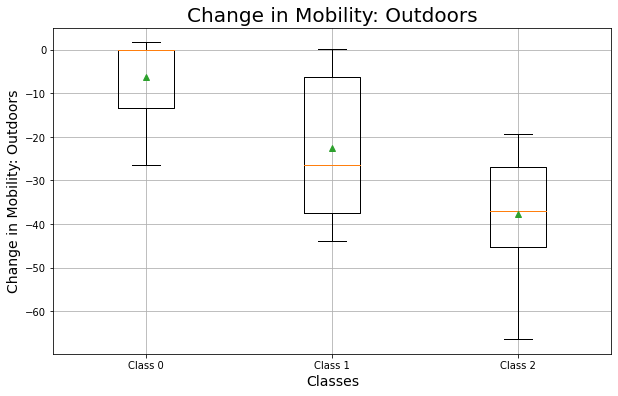

In [39]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_mobil_outdoors, C1_mobil_outdoors, C2_mobil_outdoors]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Change in Mobility: Outdoors',fontsize=20)
ax.set_ylabel('Change in Mobility: Outdoors',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

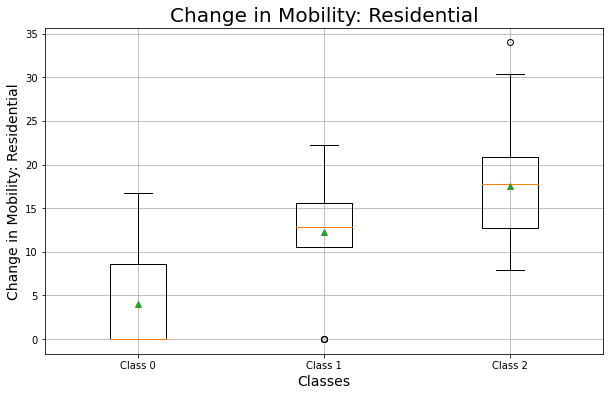

In [40]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_mobil_residential, C1_mobil_residential, C2_mobil_residential]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Change in Mobility: Residential',fontsize=20)
ax.set_ylabel('Change in Mobility: Residential',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

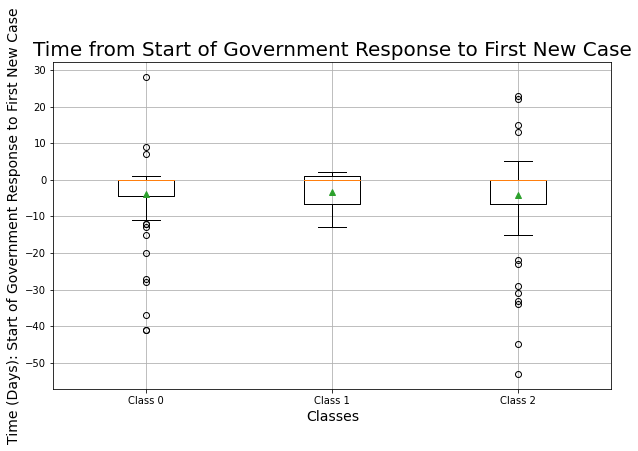

In [41]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_interval_GRToFirstNC, C1_interval_GRToFirstNC, C2_interval_GRToFirstNC]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Time from Start of Government Response to First New Case',fontsize=20)
ax.set_ylabel('Time (Days): Start of Government Response to First New Case',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

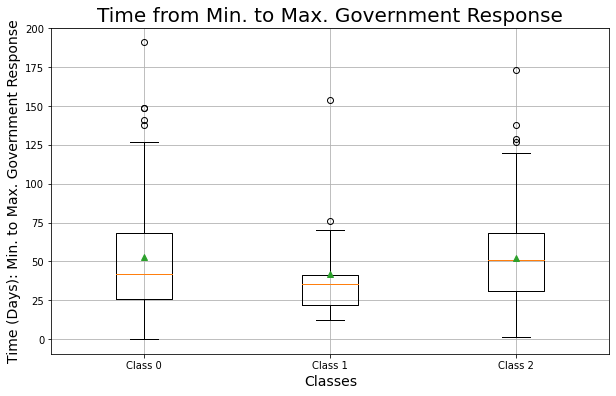

In [42]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_interval_GRRamp, C1_interval_GRRamp, C2_interval_GRRamp]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Time from Min. to Max. Government Response',fontsize=20)
ax.set_ylabel('Time (Days): Min. to Max. Government Response',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

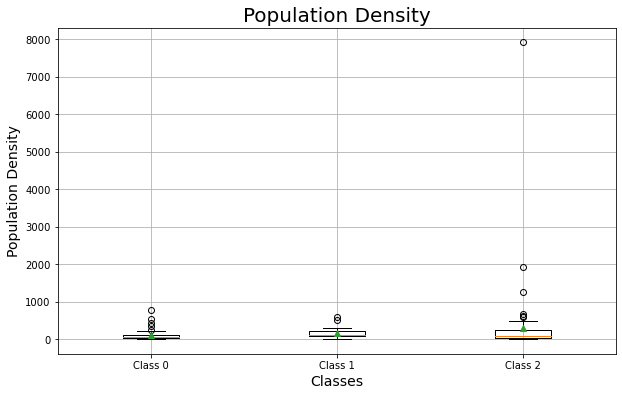

In [43]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_population_density, C1_population_density, C2_population_density]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Population Density',fontsize=20)
ax.set_ylabel('Population Density',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

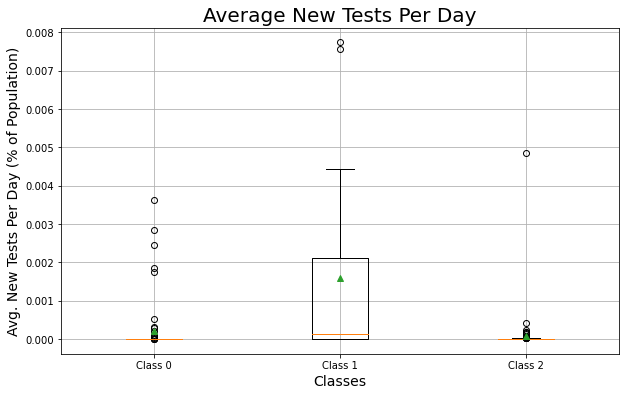

In [44]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_percent_newTestsMean, C1_percent_newTestsMean, C2_percent_newTestsMean]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Average New Tests Per Day',fontsize=20)
ax.set_ylabel('Avg. New Tests Per Day (% of Population)',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

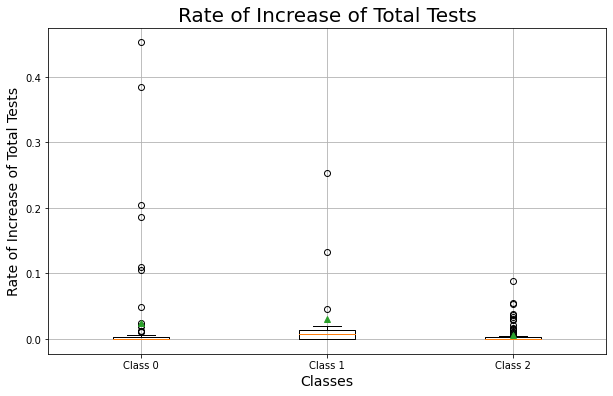

In [45]:
# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [C0_value_totTestsSlope, C1_value_totTestsSlope, C2_value_totTestsSlope]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Rate of Increase of Total Tests',fontsize=20)
ax.set_ylabel('Rate of Increase of Total Tests',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()

plt.show()

In [46]:
countryClass_df = df[['Class','country']]
countryClass_df = countryClass_df.sort_values(by="Class")
pd.set_option("display.max_rows", 162)
countryClass_df

,Class,country
0,0,Afghanistan
69,0,Iran
68,0,Indonesia
65,0,Hungary
62,0,Guyana
61,0,Guinea
132,0,Somalia
134,0,South Korea
128,0,Sierra Leone
56,0,Germany


,Unnamed: 0,country,Class,rankSum,log_rankSum
0,0,Vietnam,2,16,1.204120
1,1,Japan,0,55,1.740363
2,2,Myanmar,0,73,1.863323
3,3,India,2,80,1.903090
4,4,Australia,0,84,1.924279
5,5,Sri Lanka,2,87,1.939519
6,6,Philippines,2,90,1.954243
7,7,Indonesia,0,91,1.959041
8,8,Togo,0,93,1.968483
9,9,Uganda,2,96,1.982271


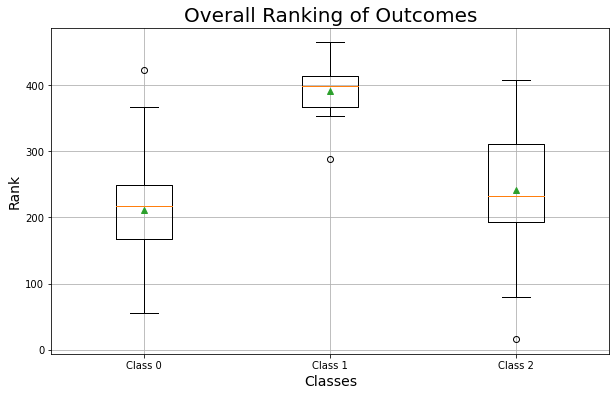

In [47]:
display(rankSum)

class0rank = rankSum.loc[rankSum['Class'] == 0]
class1rank = rankSum.loc[rankSum['Class'] == 1]
class2rank = rankSum.loc[rankSum['Class'] == 2]

rank0 = class0rank['rankSum']
rank1 = class1rank['rankSum']
rank2 = class2rank['rankSum']

# add box-and-whisker plots for all classes to the same graph
x_labels = ["Class 0","Class 1","Class 2"]
data = [rank0, rank1, rank2]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Overall Ranking of Outcomes',fontsize=20)
ax.set_ylabel('Rank',fontsize=14)
ax.set_xlabel("Classes",fontsize=14)
ax.boxplot(data, labels=x_labels, showmeans=True)

ax.grid()
# save the figure
plt.savefig("Boxplot_overallRankClasses.png")
plt.show()

# outcomes are percent_maxNC, percent_TC_3mnth, interval_firstNCToMaxNC